# Training SVM model to detect spam texts

There are 5572 rows and 2 columns
  Category                                            Message  Label
0      ham  Go until jurong point, crazy.. Available only ...      0
1      ham                      Ok lar... Joking wif u oni...      0
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...      1
3      ham  U dun say so early hor... U c already then say...      0
4      ham  Nah I don't think he goes to usf, he lives aro...      0
5     spam  FreeMsg Hey there darling it's been 3 week's n...      1
6      ham  Even my brother is not like to speak with me. ...      0
7      ham  As per your request 'Melle Melle (Oru Minnamin...      0
8     spam  WINNER!! As a valued network customer you have...      1
9     spam  Had your mobile 11 months or more? U R entitle...      1
Category    0
Message     1
Label       0
dtype: int64
There are 5571 rows and 3 columns
ham     4824
spam     747
Name: Category, dtype: int64


/home/viking/DEV/SpamFilter/datapreprocessing.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(df.columns.difference(['v1', 'v2']), 1, inplace=True)


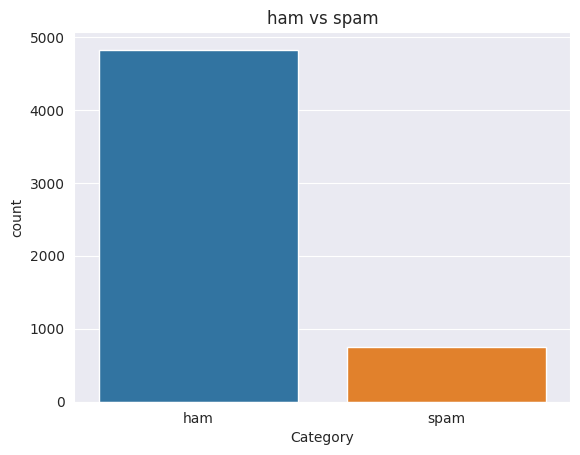

                                             Message  Label
0  go jurong point crazi avail bugi n great world...      0
1                              ok lar joke wif u oni      0
2  free entri wkli comp win fa cup final tkt st m...      1
3                u dun say earli hor u c alreadi say      0
4               nah think goe usf live around though      0
[[   0    0    0 ...   29  367 1975]
 [   0    0    0 ...  196 2785 2786]
 [   0    0    0 ...  740   11 2788]
 ...
 [   0    0    0 ... 1183  119   28]
 [   0    0    0 ... 1404 1113   11]
 [   0    0    0 ...  278  334  134]]


/home/viking/DEV/SpamFilter/datapreprocessing.py:96: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train = np.array(tokenizer.texts_to_sequences(X_train))
/home/viking/DEV/SpamFilter/datapreprocessing.py:97: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_test = np.array(tokenizer.texts_to_sequences(X_test))


In [3]:
from datapreprocessing import get_cleaned_data
X_train, X_test, y_train, y_test, vocab_size, sentence_len = get_cleaned_data()

In [ ]:
# train our model
from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# test our model
y_pred = clf.predict(X_test)

In [ ]:
# evaluate our model
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

In [ ]:
# test our model with new data
new_data = ["Congrats!, you've just won 1,000$ Amazon Gift Card please click on the link here: http://bit.ly/123456", "Hey, you forgot your 20$ at my place!"]
new_data = [pre_process(text) for text in new_data]
new_data = vectorizer.transform(new_data)
new_data_pred = clf.predict(new_data)
print(new_data_pred)

[Text(0, 0.5, 'Not Spam'), Text(0, 1.5, 'Spam')]

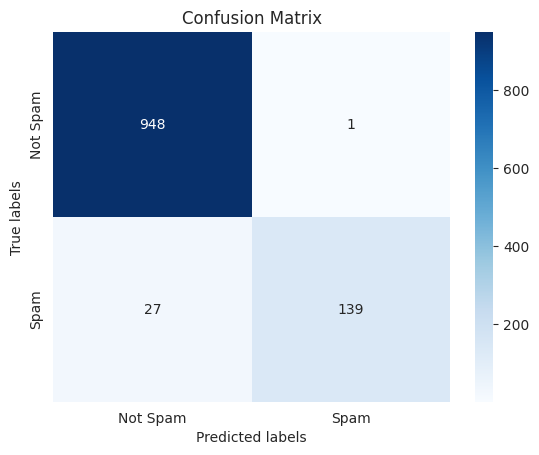

In [8]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, ax = ax,cmap='Blues',fmt='')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted labels')
ax.xaxis.set_ticklabels(['Not Spam', 'Spam'])
ax.set_ylabel('True labels')
ax.yaxis.set_ticklabels(['Not Spam', 'Spam'])
